In [4]:
# Library
import winsound
def beepEnd():
    d = 200
    freq = [3000,5000,3000,5000]
    for i in freq:
        winsound.Beep(i, d)
import warnings
import pandas as pd 
import numpy as np
import pickle 
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from itertools import combinations
from itertools import permutations

In [5]:
# Functions
warnings.filterwarnings('ignore')
def acceptanceProbability (bestMSE, newMSE, temp , K):
        # If the new solution is worse, calculate an acceptance probability
        return np.exp( K * (newMSE - bestMSE) / temp)
def calcMSE(combDesc, x_train, x_val, y_train, y_val, model):
    x_train_slice = x_train.iloc[:,combDesc]
    x_val_slice = x_val.iloc[:,combDesc]
    model.fit(x_train_slice, y_train)
    y_pred = model.predict(x_val_slice)
    return mean_squared_error(y_val, y_pred)

In [11]:
dtTrain = pickle.load(open("./pickle/train_reduced.pkl","rb"))
dtTrain.head()

VR1_A      AATS8v      AATS1i      AATS5i    ATSC2dv    ATSC5dv  \
0   388.463264  168.096148  145.720280  158.019815  67.716446  -6.822306   
1   385.352598  163.066886  145.641023  158.140044  69.903374   3.735943   
2   680.973537  199.305434  146.875307  158.089388  12.880883   9.807580   
3   210.041446  164.710770  151.225029  160.555110  24.197531 -59.456790   
4  3979.637794  204.418517  151.476138  162.994107  16.952909  -6.966759   

     ATSC6dv    ATSC7dv     ATSC8dv    ATSC2d  ...       TDB10i     RDF35m  \
0 -33.705104 -82.790170  -87.442344  8.759452  ...  1527.493377  13.077664   
1 -36.302791 -86.831737 -122.275718  2.095377  ...  1525.903707  12.098395   
2  -0.912536 -64.550604  -41.047897  8.231987  ...  1551.999629  10.917638   
3 -54.567901 -82.925926  -51.123457  7.114198  ...  1619.499968  10.279575   
4 -15.318560 -33.218837   30.135734  3.658972  ...  1499.350890  11.702749   

     RDF40m     RDF60m    RDF70m     RDF75m     RDF45s    RNCS.1  MDEC-13.2  \
0  2.500471  11.916735  4.378849   8.291557  30.163957  3.287458   5.726273   
1  4.934237  12.641875  5.399668   8.991372  28.509782  3.216475   6.423211   
2  2.753623  10.540571  2.803914  10.182094  33.225673  4.248298   2.078258   
3  2.355533   7.416363  3.158195   7.597106  28.105172  3.568316   1.529303   
4  4.731428  15.522033  4.846049  13.221135  43.290069  2.027855   1.568799   

   pIC50  
0  4.456  
1  4.347  
2  6.065  
3  6.886  
4  7.796  

[5 rows x 73 columns]

In [15]:
descName = dtTrain.columns.to_list()

73

In [16]:
##### SIMULATED ANNEALING #####

# 0. Preparation Data
train, val = train_test_split(dtTrain, test_size = 0.2, random_state = 45)

x_train = train.iloc[:,:-1]
x_val = val.iloc[:,:-1]
y_train = train.iloc[:, [-1]]
y_val = val.iloc[:,[-1]]

model = LinearRegression()

In [23]:
##### INTO DE SA DE LA'SOIN #####
descNum = 6
descMSE_20 = []

for j in tqdm(range(20)):
    # 3.1Initiate Values
    initTemp, temp = 100, 100
    tempEnd = 0.1
    cooling_rate = 0.98
    iteration = 5 

    # 3.1 Simulated Annealing
    bestList = []
    bestMSEList = []
    sounded = True

    # 3.2 Initialize solution & Best MSE (Random 6 descriptor)
    bestSol = np.random.choice(x_train.shape[1],descNum, replace=False)
    bestSol = list(bestSol)
    bestSol.sort()

    # 3.3 MSE
    bestMSE = calcMSE(bestSol, x_train, x_val, y_train, y_val, model)
    while temp > tempEnd:
        for i in range(iteration):

            # 3.3.1 Create new solution & new MSE
            newSol = np.random.choice(x_train.shape[1], descNum, replace=False)
            newMSE = calcMSE(newSol, x_train, x_val, y_train, y_val, model)
            deltaMSE = newMSE - bestMSE
            K = (initTemp * np.log(0.8)) / deltaMSE

            if newMSE < bestMSE :
                bestMSE = newMSE
                bestSol = newSol
                bestList.append([bestMSE,bestSol])
            else :
                if acceptanceProbability (bestMSE, newMSE, temp , K) > np.random.rand(0,1):
                    bestMSE = newMSE
                    bestSol = newSol
                    bestList.append([bestMSE,bestSol])

        temp *= cooling_rate
        bestMSEList.append(bestMSE)

    descMSE_20.append([bestList[-1][0],bestList[-1][1],bestMSEList])
beepEnd()

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [02:08<00:00,  6.41s/it]


In [21]:
pd.DataFrame(descMSE_20)

0                         1  \
0   0.314893    [5, 8, 69, 18, 68, 40]   
1   0.321302   [36, 28, 51, 18, 7, 17]   
2   0.308369   [11, 55, 71, 51, 54, 6]   
3   0.264104   [18, 36, 38, 69, 63, 1]   
4   0.243031  [68, 40, 51, 31, 43, 11]   
5   0.311125     [6, 7, 1, 18, 51, 29]   
6   0.270687   [19, 1, 31, 69, 51, 11]   
7   0.296987  [69, 17, 61, 40, 11, 59]   
8   0.308896    [68, 8, 28, 17, 2, 14]   
9   0.270073   [1, 55, 15, 51, 31, 46]   
10  0.275868   [51, 61, 24, 1, 57, 34]   
11  0.273083   [11, 59, 40, 7, 71, 51]   
12  0.303081  [62, 40, 17, 11, 28, 68]   
13  0.323922  [51, 28, 14, 38, 68, 54]   
14  0.241168  [45, 18, 68, 63, 69, 40]   
15  0.284031  [28, 55, 27, 18, 51, 63]   
16  0.263906   [51, 65, 15, 68, 8, 55]   
17  0.258842  [58, 65, 42, 18, 36, 46]   
18  0.269857     [8, 53, 28, 38, 1, 3]   
19  0.306361   [13, 23, 11, 69, 40, 5]   

                                                    2  
0   [0.7316678679573337, 0.5993518980814015, 0.536...  
1   [0.5898429095267148, 0.5898429095267148, 0.544...  
2   [0.5117951154787834, 0.5117951154787834, 0.511...  
3   [0.5696805691008677, 0.3936350922113985, 0.393...  
4   [0.4751517944090355, 0.4751517944090355, 0.475...  
5   [0.6429002479483344, 0.590779674707642, 0.5587...  
6   [0.5394544310646834, 0.5394544310646834, 0.539...  
7   [0.45293974323287745, 0.45293974323287745, 0.3...  
8   [0.4947086928690902, 0.31201647271211985, 0.31...  
9   [0.350890571877757, 0.350890571877757, 0.35089...  
10  [0.40283883331216386, 0.40283883331216386, 0.4...  
11  [0.32842106524089737, 0.32842106524089737, 0.3...  
12  [0.4385044163587919, 0.4385044163587919, 0.390...  
13  [0.5468826105561561, 0.5468826105561561, 0.546...  
14  [0.5203789300202372, 0.5203789300202372, 0.520...  
15  [0.586616667540174, 0.5415992272193308, 0.5415...  
16  [0.5746419792367554, 0.5746419792367554, 0.331...  
17  [0.4427251882045528, 0.2948658860132462, 0.294...  
18  [0.6373901742477069, 0.4566436543120612, 0.456...  
19  [0.42308592790614974, 0.42308592790614974, 0.4...

In [22]:
dfBestDM = pd.DataFrame(descMSE_20)
dfBestDM.columns=["MSE","solution","growth"]
dfBestDM.sort_values('MSE', inplace=True)
dfBestDM.reset_index(drop=True, inplace= True)
dfBestDM

MSE                  solution  \
0   0.241168  [45, 18, 68, 63, 69, 40]   
1   0.243031  [68, 40, 51, 31, 43, 11]   
2   0.258842  [58, 65, 42, 18, 36, 46]   
3   0.263906   [51, 65, 15, 68, 8, 55]   
4   0.264104   [18, 36, 38, 69, 63, 1]   
5   0.269857     [8, 53, 28, 38, 1, 3]   
6   0.270073   [1, 55, 15, 51, 31, 46]   
7   0.270687   [19, 1, 31, 69, 51, 11]   
8   0.273083   [11, 59, 40, 7, 71, 51]   
9   0.275868   [51, 61, 24, 1, 57, 34]   
10  0.284031  [28, 55, 27, 18, 51, 63]   
11  0.296987  [69, 17, 61, 40, 11, 59]   
12  0.303081  [62, 40, 17, 11, 28, 68]   
13  0.306361   [13, 23, 11, 69, 40, 5]   
14  0.308369   [11, 55, 71, 51, 54, 6]   
15  0.308896    [68, 8, 28, 17, 2, 14]   
16  0.311125     [6, 7, 1, 18, 51, 29]   
17  0.314893    [5, 8, 69, 18, 68, 40]   
18  0.321302   [36, 28, 51, 18, 7, 17]   
19  0.323922  [51, 28, 14, 38, 68, 54]   

                                               growth  
0   [0.5203789300202372, 0.5203789300202372, 0.520...  
1   [0.4751517944090355, 0.4751517944090355, 0.475...  
2   [0.4427251882045528, 0.2948658860132462, 0.294...  
3   [0.5746419792367554, 0.5746419792367554, 0.331...  
4   [0.5696805691008677, 0.3936350922113985, 0.393...  
5   [0.6373901742477069, 0.4566436543120612, 0.456...  
6   [0.350890571877757, 0.350890571877757, 0.35089...  
7   [0.5394544310646834, 0.5394544310646834, 0.539...  
8   [0.32842106524089737, 0.32842106524089737, 0.3...  
9   [0.40283883331216386, 0.40283883331216386, 0.4...  
10  [0.586616667540174, 0.5415992272193308, 0.5415...  
11  [0.45293974323287745, 0.45293974323287745, 0.3...  
12  [0.4385044163587919, 0.4385044163587919, 0.390...  
13  [0.42308592790614974, 0.42308592790614974, 0.4...  
14  [0.5117951154787834, 0.5117951154787834, 0.511...  
15  [0.4947086928690902, 0.31201647271211985, 0.31...  
16  [0.6429002479483344, 0.590779674707642, 0.5587...  
17  [0.7316678679573337, 0.5993518980814015, 0.536...  
18  [0.5898429095267148, 0.5898429095267148, 0.544...  
19  [0.5468826105561561, 0.5468826105561561, 0.546...

In [ ]:
bestDescriptor = []
for i in dfBestDM.iloc[0,1]:
    bestDescriptor.append(descName[i])

bestMSEGrowth = dfBestDM.iloc[0,2]

In [ ]:
# Pickle descriptor name
pickle.dump(dfBestDM, open('./data/MSE_EvolutionV2.pkl', 'wb'))
pickle.dump(bestDescriptor, open('./data/bestDescV2.pkl', 'wb'))
pickle.dump(bestMSEGrowth, open('./data/bestMSEGrowthV2.pkl','wb'))

In [4]:
MSE_Evol = pickle.load(open('./data/MSE_EvolutionV2.pkl', 'rb'))

Text(0, 0.5, 'MSE')

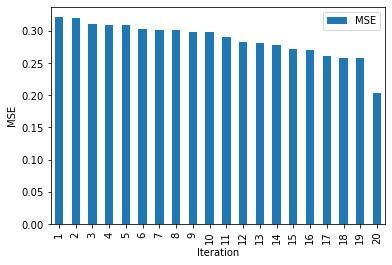

In [10]:
type(MSE_Evol)
# MSE_Evol
dfBestDM = MSE_Evol.sort_values('MSE', ascending=False)
df = dfBestDM.reset_index(drop=True)
df.index += 1
dfPlot = df.plot.bar()
dfPlot.set_xlabel("Iteration")
dfPlot.set_ylabel("MSE")

In [ ]:
############## CUSTOMIZED CODE ##################################

In [ ]:
# bestMSEList
dfBest.columns = ["mse","solution"]
dfBest.sort_values('mse', inplace=True)
dfBest.reset_index(drop=True, inplace= True)
dfBest

In [ ]:
bestSolution = dfBest.loc[0,'solution']
bestSolution = list(bestSolution)
bestSolution.sort()
bestSolution

In [ ]:
bestDescriptor = []

for i in bestSolution:
    bestDescriptor.append(descName[i])
bestDescriptor

In [ ]:
mseNdarray = np.asarray(bestMSEList)
type(mseNdarray)
mseNdarray.dump("./bestMSEList_2.pkl")
dfBest.iloc[-1][1].dump("./bestDesc_2.pkl")

In [ ]:
len(mseNdarray)
np.arange(0,len(mseNdarray),1)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#define variable x
x = np.arange(0,len(mseNdarray),1)
y = mseNdarray 

#plot the functions
plt.grid()
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error (MSE)")

plt.plot(x,y)

In [ ]:
MSE_Evol = pickle.load(open('./data/MSE_EvolutionV2.pkl', 'rb'))
bestDesc = pickle.load(open('./data/bestDescV2.pkl', 'rb'))
bestMSEGrowth = pickle.load(open('./data/bestMSEGrowthV2.pkl', 'rb'))

In [ ]:
bestDesc, MSE_Evol, bestMSEGrowth

In [ ]:
bestMSEGrowth

In [ ]:
# First Best Run
# BestDescriptors=  [31,18,54,36,8,51]
# BestMSE =  0.24519892533514573

# Second Best Run
# Best Descriptors :  [53 61 18 69 36 34]
# Best MSE :  0.22850883728849938

# Best Descriptors :  [40 11  5 67 64 69]
# Best MSE :  0.22858482530945248

# Best Descriptors :  [38 51 55 58 36 18]
# Best MSE :  0.20720460921006825

In [ ]:
# ### Smallest Values before run 20s
# bs = [38, 51, 55, 58, 36, 18]
# bs.sort()
# bs

In [ ]:
# bds = []
# for i in bs:
#     bds.append(descName[i])
# bds

In [ ]:
# pickle.dump(bds,open('./BestDescriptor.pkl','wb'))